In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from taigapy import create_taiga_client_v3
import re
from statannotations.Annotator import Annotator

In [2]:
tc = create_taiga_client_v3()

## Get CRISPR dependencies matrix from TAIGA

In [3]:
crispr_effect = tc.get(name='internal-24q4-8c04', version=101, file='CRISPRGeneEffect')

In [4]:
crispr_effect

,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),AADAC (13),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
ACH-000001,-0.145242,0.019477,0.056237,-0.173868,0.005131,0.218239,-0.068562,-0.058885,0.191578,0.002530,...,-0.132745,0.080368,0.159529,0.258031,0.179917,-0.249540,0.052480,0.080656,0.160498,-0.426900
ACH-000004,-0.039512,-0.073714,-0.085854,-0.075194,0.021538,-0.140434,0.247872,-0.046966,0.215978,0.131511,...,-0.264802,-0.403360,0.199695,0.105634,0.095723,0.076356,-0.311548,0.106594,0.271735,-0.054990
ACH-000005,-0.179671,0.041547,0.187036,0.088175,-0.127169,-0.259563,0.154824,-0.045603,-0.135695,0.018855,...,-0.331664,-0.393016,-0.083058,-0.047129,0.002738,-0.174817,-0.058520,-0.040518,0.066276,-0.090507
ACH-000007,-0.058821,-0.127777,0.084479,0.065821,0.039912,-0.016302,-0.023659,-0.156820,-0.160647,0.171016,...,-0.365998,-0.363134,-0.042620,0.264256,0.049146,-0.052702,-0.399776,0.020496,-0.283006,-0.369503
ACH-000009,-0.043372,-0.141960,0.078283,0.061353,0.118325,-0.100590,0.025024,-0.095865,0.053149,0.059934,...,-0.341299,-0.261603,-0.032972,0.257242,-0.068297,-0.075614,-0.509414,0.092275,-0.011776,-0.274946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-003578,-0.171139,-0.058941,-0.093873,0.019887,-0.026497,-0.073211,0.080759,-0.127011,-0.075251,0.002337,...,-0.341456,-0.458900,-0.040988,0.109176,-0.171388,-0.063561,-0.139759,-0.053729,-0.146962,-0.368850
ACH-003580,0.055524,0.208115,-0.087154,0.078650,0.132832,-0.003156,0.118247,-0.231775,0.045564,0.280823,...,-0.333588,-0.660225,0.034779,0.273591,-0.186056,-0.208219,-0.308978,0.129455,-0.163789,-0.338718
ACH-003587,-0.017993,-0.372994,-0.082105,0.216732,-0.017278,0.009151,0.071652,-0.553196,-0.224519,0.309110,...,-0.414315,-0.630464,-0.144833,0.151849,-0.146543,0.029709,-0.387989,0.067026,-0.249321,-0.192970
ACH-003590,-0.087854,-0.008505,0.056008,0.146640,-0.112046,-0.052856,0.165373,-0.423358,0.010036,0.157737,...,-0.623025,-0.618526,-0.090796,0.138445,-0.068029,0.022866,-0.089312,0.025531,-0.182506,-0.271250


## Getting transcription factors list

In [5]:
tfs = pd.read_csv("data/tf_list.csv")
tfs_reviewed = pd.read_excel("data/TF_names.xlsx")

In [6]:
tfs_reviewed = tfs_reviewed[["Original names", "new names"]]

In [7]:
tfs = tfs[~tfs["hugo_symbol"].isin(tfs_reviewed["Original names"].values)]

In [8]:
tfs["hugo_symbol"] = pd.concat([tfs["hugo_symbol"], tfs_reviewed["new names"]], ignore_index=True)

### Filtering CRISPR dependency matrix for TFs

In [9]:
crispr_effect.columns = [re.sub(r"\(\d+\)", "", c).strip() for c in crispr_effect.columns]

In [10]:
tfs_found = [tf for tf in tfs["hugo_symbol"] if tf in crispr_effect.columns]

In [11]:
len(tfs_found)

1543

In [12]:
crispr_effect = crispr_effect.loc[:, tfs_found]

In [13]:
crispr_effect.to_pickle("pydata/tfs_dependencies.pkl")

## Getting CRISPR dependencies

In [14]:
crispr_dependencies = tc.get(name='internal-24q4-8c04', version=101, file='CRISPRGeneDependency')

In [15]:
crispr_dependencies.head()

,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),AADAC (13),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
ACH-000001,0.081472,0.019557,0.013884,0.100987,0.022365,0.003256,0.043409,0.039893,0.004096,0.022905,...,0.073907,0.011079,0.005414,0.002309,0.004529,0.168268,0.014377,0.011050,0.005369,0.402964
ACH-000004,0.030400,0.042046,0.047038,0.042626,0.016766,0.076369,0.001879,0.032660,0.002555,0.005717,...,0.197319,0.421886,0.002982,0.007350,0.008094,0.009782,0.264322,0.007282,0.001484,0.035261
ACH-000005,0.069625,0.014287,0.005318,0.010318,0.048139,0.119415,0.006585,0.026757,0.051152,0.016791,...,0.187949,0.267061,0.035086,0.027052,0.018857,0.067349,0.029373,0.025776,0.012010,0.037007
ACH-000007,0.026158,0.051310,0.005926,0.007157,0.009359,0.016853,0.018201,0.066871,0.069209,0.002658,...,0.304459,0.299673,0.022158,0.001231,0.008503,0.024572,0.363707,0.011464,0.181764,0.310430
ACH-000009,0.050087,0.124279,0.013026,0.015877,0.008146,0.086953,0.024034,0.083313,0.017457,0.016134,...,0.418924,0.284402,0.045003,0.001707,0.064220,0.068912,0.673399,0.011075,0.035978,0.306134


In [16]:
crispr_dependencies.columns = [re.sub(r"\(\d+\)", "", c).strip() for c in crispr_dependencies.columns]

In [17]:
crispr_dependencies = crispr_dependencies[tfs_found]

In [18]:
tf_dep = crispr_dependencies.mean()

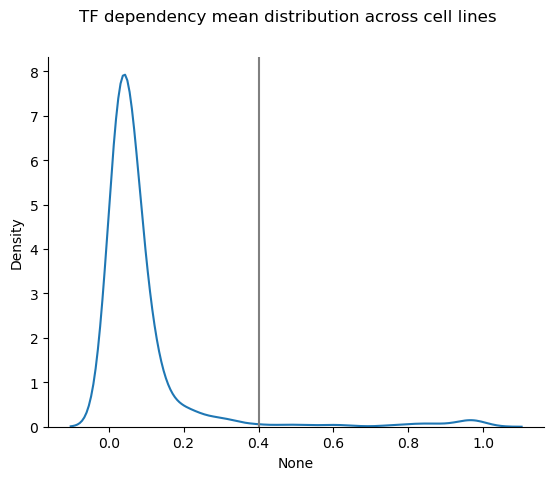

In [19]:
ax = plt.subplot(111)
sns.kdeplot(x=tf_dep, )
ax.spines[['right', 'top']].set_visible(False)
plt.suptitle("TF dependency mean distribution across cell lines",  fontsize=12)
plt.axvline(0.4, color = "grey")


In [20]:
common_essential_genes = tc.get(name='internal-24q4-8c04', version=101, file='CRISPRInferredCommonEssentials')

In [21]:
common_essential_genes.head()

,Essentials
0,AAMP (14)
1,AARS1 (16)
2,AATF (26574)
3,ABCB7 (22)
4,ABCE1 (6059)


In [22]:
common_essential_genes = [re.sub(r"\(\d+\)", "", c).strip() for c in common_essential_genes["Essentials"].values]

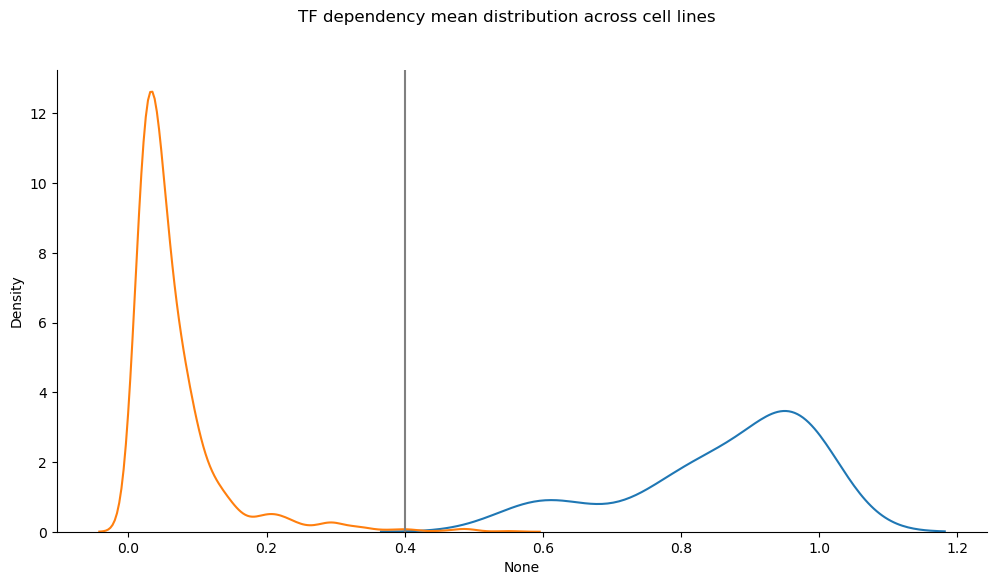

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(x = tf_dep.loc[tf_dep.index.isin(common_essential_genes)], )
sns.kdeplot(x = tf_dep.loc[~tf_dep.index.isin(common_essential_genes)], )
ax.spines[['right', 'top']].set_visible(False)
plt.suptitle("TF dependency mean distribution across cell lines",  fontsize=12)
plt.axvline(0.4, color = "grey")

In [24]:
tf_dep.head()

TFAP2A    0.081059
TFAP2B    0.053437
TFAP2C    0.138190
TFAP2D    0.068677
TFAP2E    0.068599
dtype: float64

In [25]:
tf_list = tf_dep.loc[~tf_dep.index.isin(common_essential_genes)]

In [26]:
crispr_dependencies = crispr_dependencies[tf_list.index]

In [27]:
crispr_effect = crispr_effect[tf_list.index]

In [28]:
crispr_effect.shape

(1373, 1497)

## Geting model information

In [29]:
model = tc.get(name='internal-24q4-8c04', version=101, file='Model')

In [30]:
model.head()

,ModelID,PatientID,CellLineName,StrippedCellLineName,DepmapModelType,OncotreeLineage,OncotreePrimaryDisease,OncotreeSubtype,OncotreeCode,PatientSubtypeFeatures,...,EngineeredModelDetails,CulturedResistanceDrug,PublicComments,CCLEName,HCMIID,ModelAvailableInDbgap,ModelSubtypeFeatures,WTSIMasterCellID,SangerModelID,COSMICID
0,ACH-000001,PT-gj46wT,NIH:OVCAR-3,NIHOVCAR3,HGSOC,Ovary/Fallopian Tube,Ovarian Epithelial Tumor,High-Grade Serous Ovarian Cancer,HGSOC,None,...,None,None,None,NIHOVCAR3_OVARY,None,Available in SRA,None,2201.0,SIDM00105,905933.0
1,ACH-000002,PT-5qa3uk,HL-60,HL60,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,"TP53(del), CDKN2A and NRAS mutations [PubMed=2...",...,None,None,None,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,None,Available in SRA,None,55.0,SIDM00829,905938.0
2,ACH-000003,PT-puKIyc,CACO2,CACO2,COAD,Bowel,Colorectal Adenocarcinoma,Colon Adenocarcinoma,COAD,None,...,None,None,None,CACO2_LARGE_INTESTINE,None,Available in SRA,None,NaN,SIDM00891,NaN
3,ACH-000004,PT-q4K2cp,HEL,HEL,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,"JAK2 and TP53 mutations,",...,None,None,None,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,None,Available in SRA,None,783.0,SIDM00594,907053.0
4,ACH-000005,PT-q4K2cp,HEL 92.1.7,HEL9217,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,JAK2 and TP53 mutations,...,None,None,None,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,None,Available in SRA,None,NaN,SIDM00593,NaN


In [31]:
crispr_effect_dep = pd.merge(crispr_dependencies.melt(ignore_index=False, value_name="dependency", var_name="TF").reset_index().rename(columns={'index':'ModelID'}),
        crispr_effect.melt(ignore_index=False, value_name="effect", var_name="TF").reset_index().rename(columns={'index':'ModelID'}), 
        on = ["TF", "ModelID"])

In [32]:
crispr_effect_dep = crispr_effect_dep.merge(model[["ModelID", "OncotreeLineage"]])

In [33]:
crispr_effect_dep.head()

,ModelID,TF,dependency,effect,OncotreeLineage
0,ACH-000001,TFAP2A,0.017366,0.032275,Ovary/Fallopian Tube
1,ACH-000004,TFAP2A,0.005019,0.145169,Myeloid
2,ACH-000005,TFAP2A,0.005894,0.171513,Myeloid
3,ACH-000007,TFAP2A,0.030224,-0.073170,Bowel
4,ACH-000009,TFAP2A,0.002433,0.224490,Bowel


In [34]:
crispr_effect_dep_bylineage = crispr_effect_dep.groupby(["OncotreeLineage", "TF"]).agg({
    "dependency": "mean",
    "effect": "mean", 
    "ModelID": "count"
}).rename(columns={"ModelID":"n_models"}).reset_index()

In [35]:
crispr_effect_dep_bylineage.head()

,OncotreeLineage,TF,dependency,effect,n_models
0,Adrenal Gland,ADNP,0.043954,-0.099758,1
1,Adrenal Gland,ADNP2,0.009477,0.109624,1
2,Adrenal Gland,AEBP1,0.034076,-0.067829,1
3,Adrenal Gland,AEBP2,0.010537,0.093067,1
4,Adrenal Gland,AHDC1,0.050846,-0.117944,1


In [36]:
crispr_effect_dep_bylineage[["OncotreeLineage", "n_models"]].drop_duplicates()

,OncotreeLineage,n_models
0,Adrenal Gland,1
1497,Ampulla of Vater,8
2994,Biliary Tract,36
4491,Bladder/Urinary Tract,34
5988,Bone,64
7485,Bowel,78
8982,Breast,66
10479,CNS/Brain,144
11976,Cervix,18
13473,Esophagus/Stomach,91


In [37]:
crispr_effect_dep_bylineage[["OncotreeLineage", "n_models"]]["n_models"].describe()

count    44910.000000
mean        45.733333
std         37.140628
min          1.000000
25%         15.000000
50%         35.500000
75%         69.000000
max        144.000000
Name: n_models, dtype: float64

In [38]:
crispr_effect_dep_bylineage = crispr_effect_dep_bylineage[crispr_effect_dep_bylineage["n_models"] > 15]

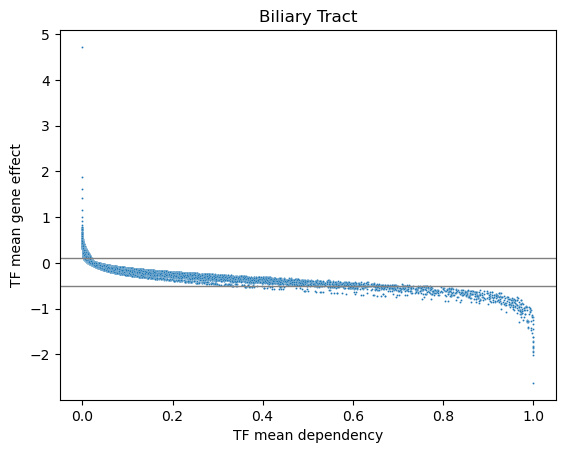

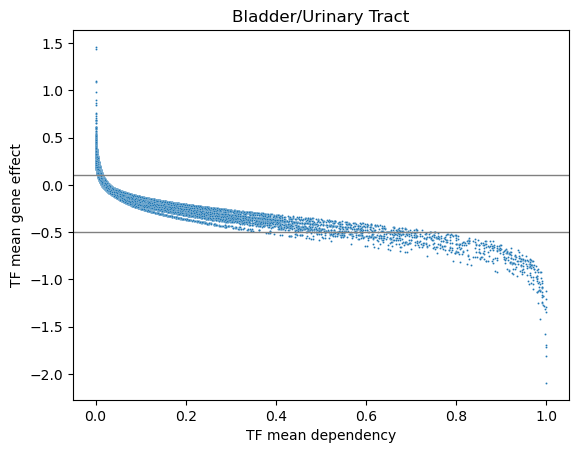

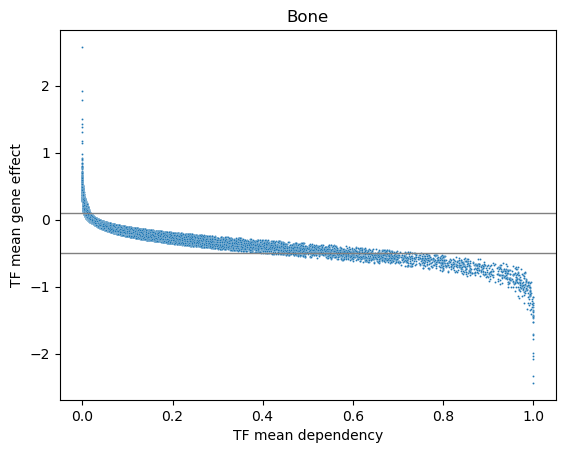

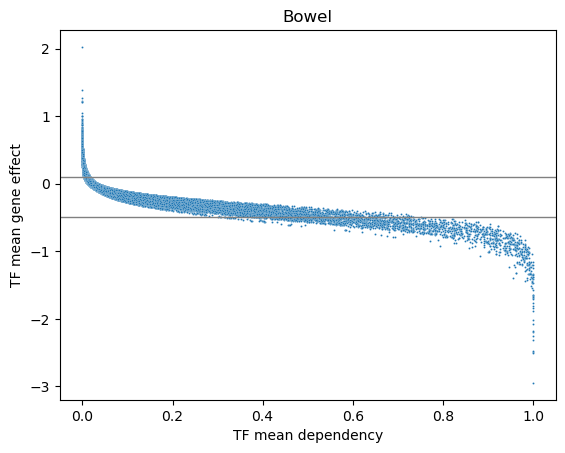

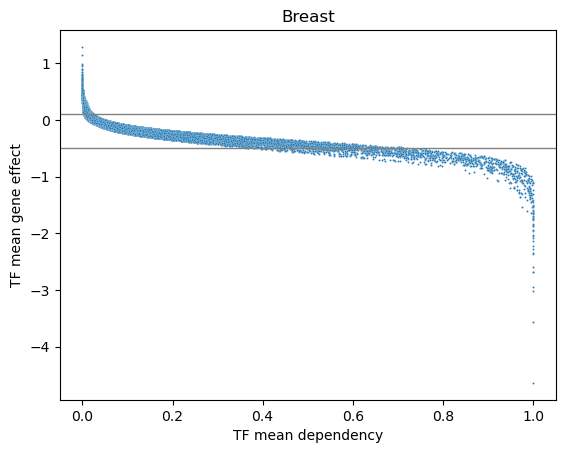

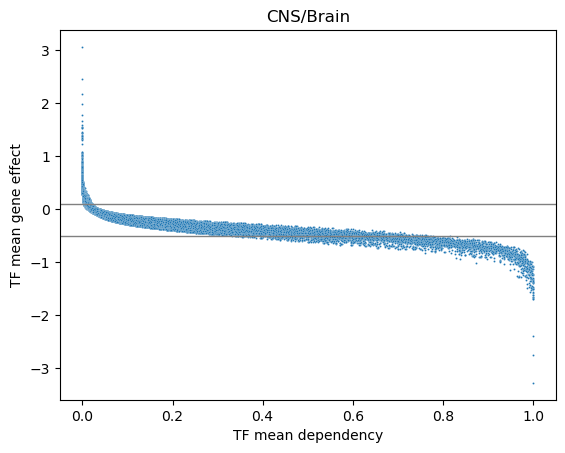

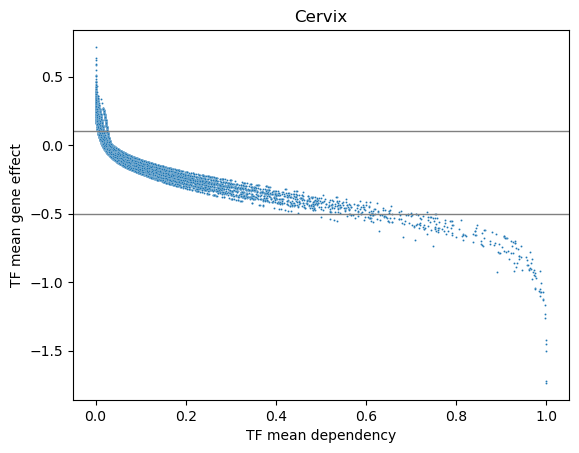

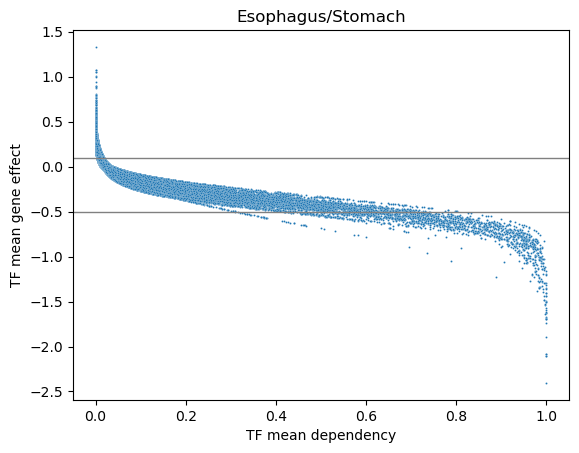

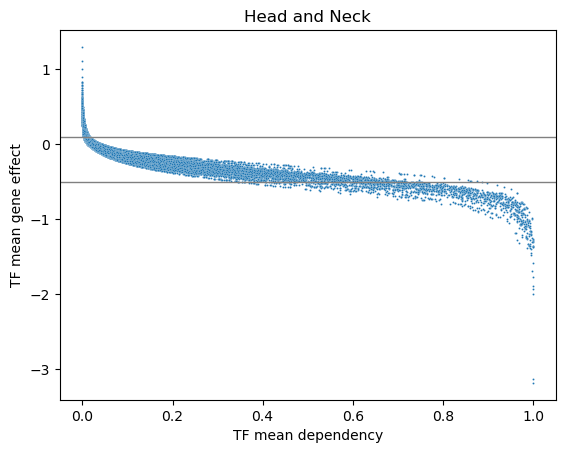

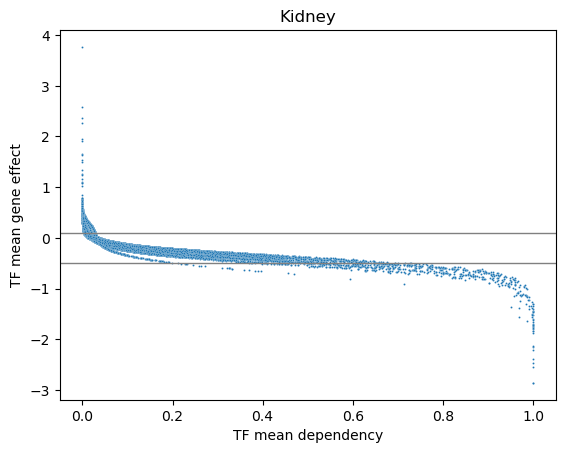

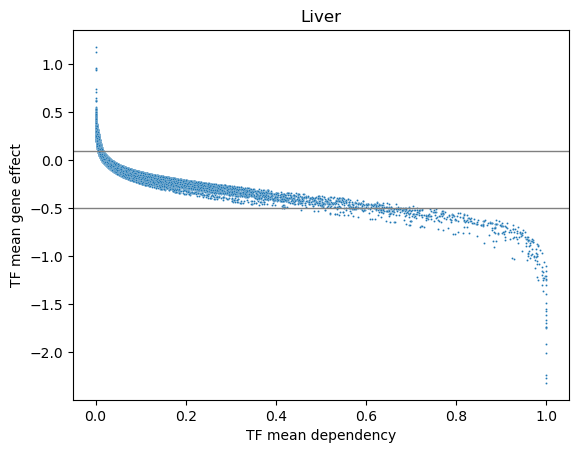

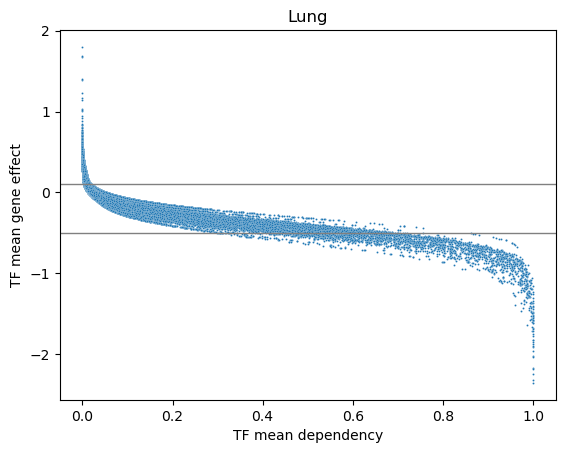

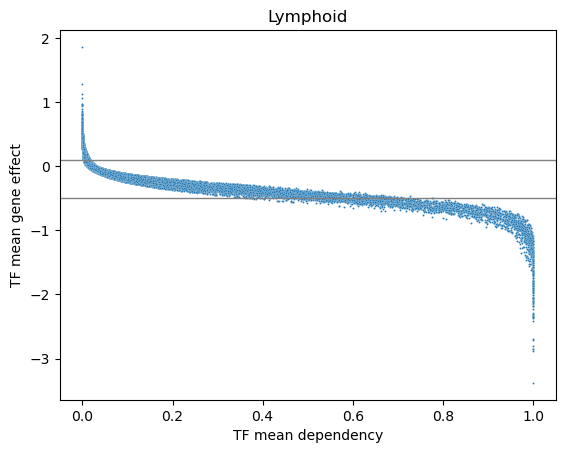

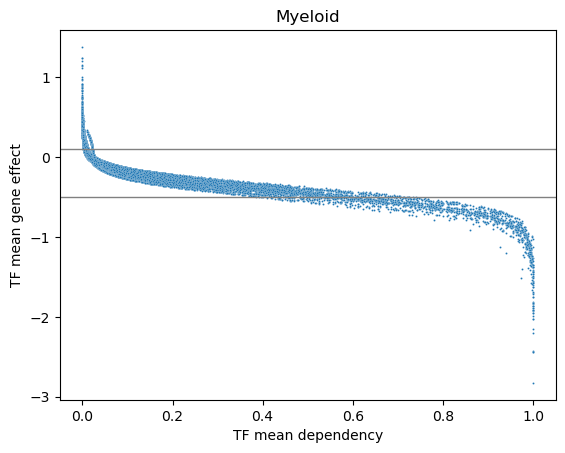

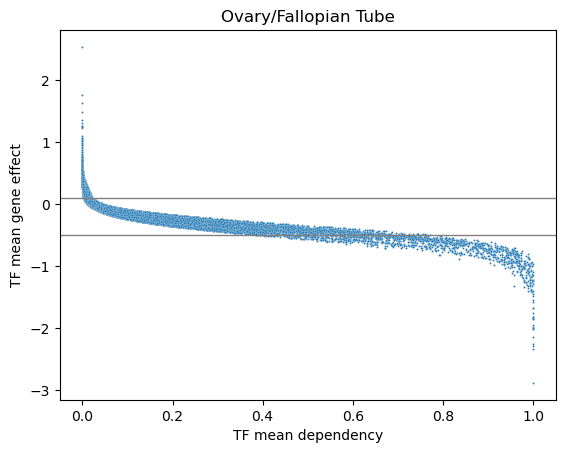

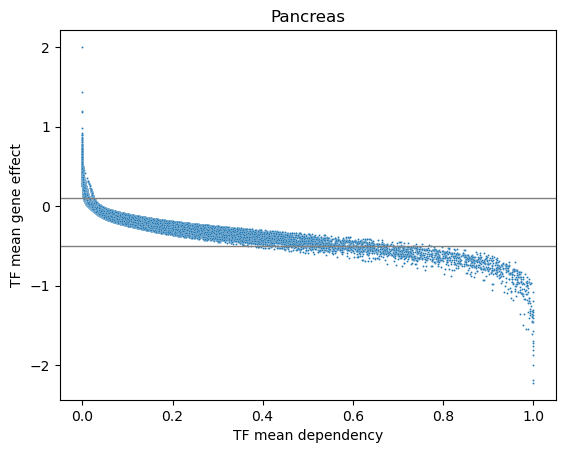

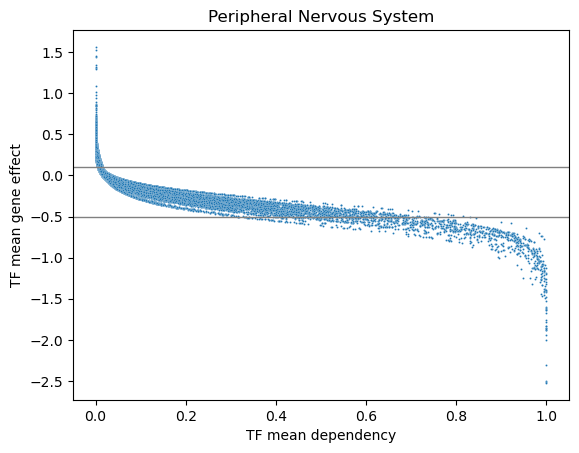

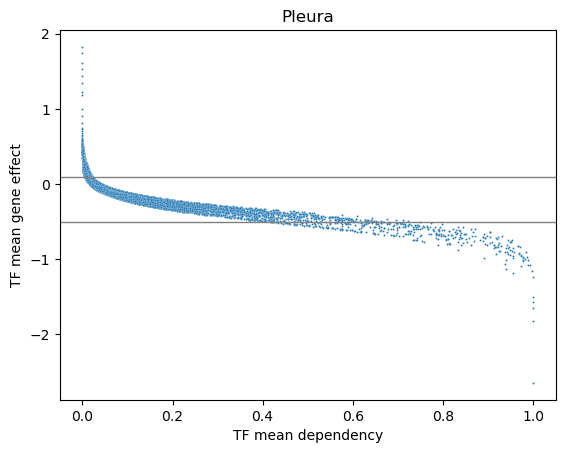

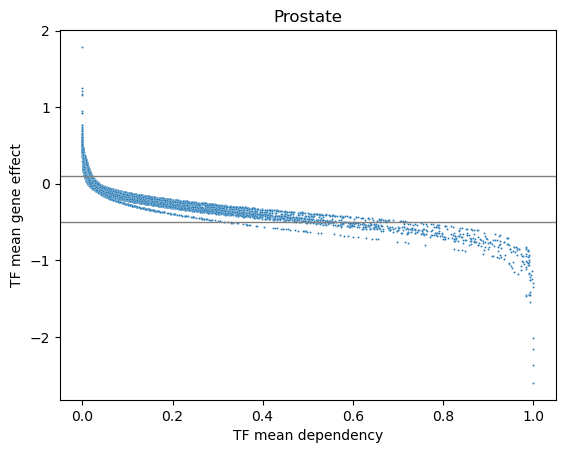

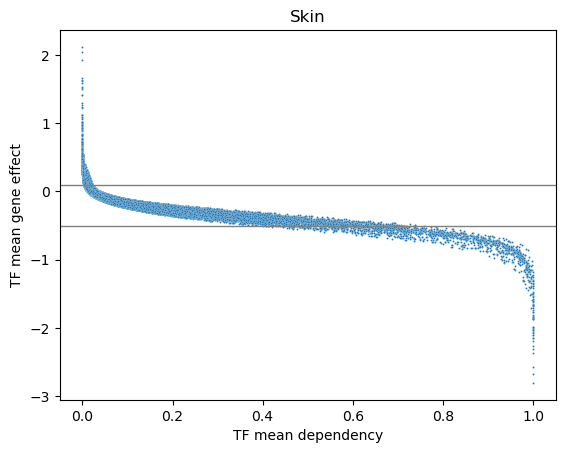

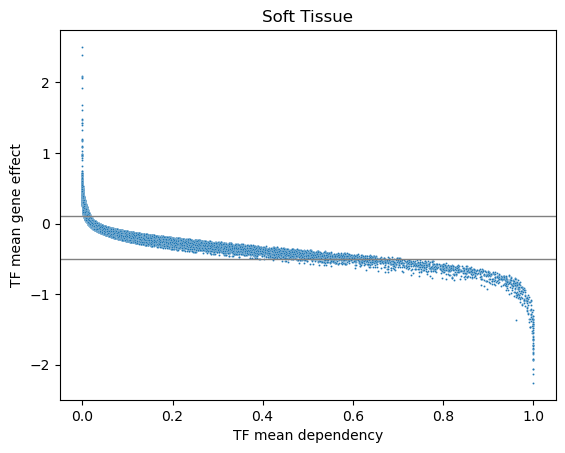

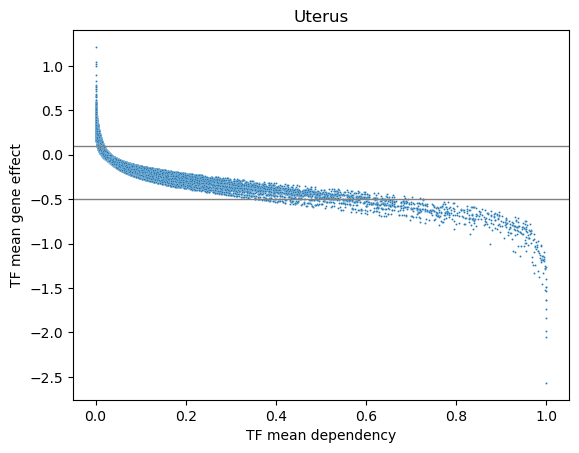

In [39]:
lineages = crispr_effect_dep_bylineage["OncotreeLineage"].unique()
for lineage in lineages:
    sns.scatterplot(data=crispr_effect_dep[crispr_effect_dep["OncotreeLineage"] == lineage], 
                    x = "dependency", y = "effect", s = 2)
    plt.axhline(0.1, color = "grey", linewidth=1)
    plt.axhline(-0.5, color = "grey", linewidth=1) 
    plt.title(lineage)
    plt.xlabel("TF mean dependency")
    plt.ylabel("TF mean gene effect")
    plt.show()

In [40]:
crispr_effect_dep_bylineage.head()

,OncotreeLineage,TF,dependency,effect,n_models
2994,Biliary Tract,ADNP,0.262168,-0.261788,36
2995,Biliary Tract,ADNP2,0.051071,-0.039606,36
2996,Biliary Tract,AEBP1,0.066771,-0.084119,36
2997,Biliary Tract,AEBP2,0.041576,-0.013291,36
2998,Biliary Tract,AHDC1,0.108234,-0.125744,36


In [41]:
tf_effect_bylineage = crispr_effect_dep_bylineage[(crispr_effect_dep_bylineage["effect"] >= 0.1) |
                                                          (crispr_effect_dep_bylineage["effect"] <= -0.5)]

In [42]:
tf_effect_bylineage["class"] = tf_effect_bylineage["effect"].apply(lambda x: "Positive" if x > 0 else "Negative") 

/var/folders/_5/qbyf0kk5779gpj3nnpqbc7wr0000gn/T/ipykernel_20589/787242896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tf_effect_bylineage["class"] = tf_effect_bylineage["effect"].apply(lambda x: "Positive" if x > 0 else "Negative")


In [43]:
tf_effect_bylineage.head()

,OncotreeLineage,TF,dependency,effect,n_models,class
2999,Biliary Tract,AHR,0.037693,0.110100,36,Positive
3000,Biliary Tract,AIRE,0.007065,0.154266,36,Positive
3009,Biliary Tract,AR,0.013571,0.117994,36,Positive
3011,Biliary Tract,ARHGAP35,0.011366,0.135980,36,Positive
3028,Biliary Tract,ATF4,0.547339,-0.523830,36,Negative


In [44]:
tf_effect_bylineage.groupby("OncotreeLineage").count()

,TF,dependency,effect,n_models,class
OncotreeLineage,,,,,
Biliary Tract,119,119,119,119,119
Bladder/Urinary Tract,113,113,113,113,113
Bone,117,117,117,117,117
Bowel,128,128,128,128,128
Breast,102,102,102,102,102
CNS/Brain,108,108,108,108,108
Cervix,109,109,109,109,109
Esophagus/Stomach,101,101,101,101,101
Head and Neck,118,118,118,118,118


In [45]:
tf_effect_bylineage = tf_effect_bylineage[["OncotreeLineage", "TF", "class"]]
tf_effect_bylineage.head()

,OncotreeLineage,TF,class
2999,Biliary Tract,AHR,Positive
3000,Biliary Tract,AIRE,Positive
3009,Biliary Tract,AR,Positive
3011,Biliary Tract,ARHGAP35,Positive
3028,Biliary Tract,ATF4,Negative


In [46]:
tf_effect_bylineage.to_pickle("pydata/tf_list_by_lineage.pkl")
tf_effect_bylineage.to_csv("pydata/tf_list_reviewed.csv")

Filter the dependency long dataframe

In [47]:
crispr_effect_dep.head()

,ModelID,TF,dependency,effect,OncotreeLineage
0,ACH-000001,TFAP2A,0.017366,0.032275,Ovary/Fallopian Tube
1,ACH-000004,TFAP2A,0.005019,0.145169,Myeloid
2,ACH-000005,TFAP2A,0.005894,0.171513,Myeloid
3,ACH-000007,TFAP2A,0.030224,-0.073170,Bowel
4,ACH-000009,TFAP2A,0.002433,0.224490,Bowel


In [48]:
crispr_effect_dep.shape

(2055381, 5)

In [49]:
crispr_effect_dep = pd.merge(how="inner", left=crispr_effect_dep, right=tf_effect_bylineage, 
                             on=["OncotreeLineage", "TF"])

In [50]:
crispr_effect_dep.shape

(156379, 6)

In [51]:
crispr_effect_dep.head()

,ModelID,TF,dependency,effect,OncotreeLineage,class
0,ACH-000141,AHR,0.002674,0.305841,Biliary Tract,Positive
1,ACH-000209,AHR,0.018868,0.019338,Biliary Tract,Positive
2,ACH-000268,AHR,0.013478,0.053837,Biliary Tract,Positive
3,ACH-000461,AHR,0.002003,0.217394,Biliary Tract,Positive
4,ACH-000976,AHR,0.003314,0.265237,Biliary Tract,Positive


## Make boxplots for CRISPR dependencies of TFs across lineages

In [52]:
pairs = [((lineage, "Positive"), (lineage, "Negative")) for lineage in crispr_effect_dep["OncotreeLineage"].unique()]

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Skin_Positive vs. Skin_Negative: Mann-Whitney-Wilcoxon test two-sided, P_val:3.040e-220 U_stat=2.337e+06
CNS/Brain_Positive vs. CNS/Brain_Negative: Mann-Whitney-Wilcoxon test two-sided, P_val:4.403e-92 U_stat=2.148e+06
Esophagus/Stomach_Positive vs. Esophagus/Stomach_Negative: Mann-Whitney-Wilcoxon test two-sided, P_val:1.091e-110 U_stat=1.574e+06
Prostate_Positive vs. Prostate_Negative: Mann-Whitney-Wilcoxon test two-sided, P_val:4.090e-15 U_stat=6.274e+04
Kidney_Positive vs. Kidney_Negative: Mann-Whitney-Wilcoxon test two-sided, P_val:1.965e-106 U_stat=6.541e+05
Uterus_Positive vs. Uterus_Negative: Mann-Whitney-Wilcoxon test two-sided, P_val:3.364e-62 U_stat=4.409e+05
Liver_Positive vs. Liver_Negative: Mann-Whitney-Wilcoxon test two-sided, P_val:4.789e-58 U_stat=2.340e+05
Pleura_Positive vs. Ple

<Figure size 3000x800 with 0 Axes>

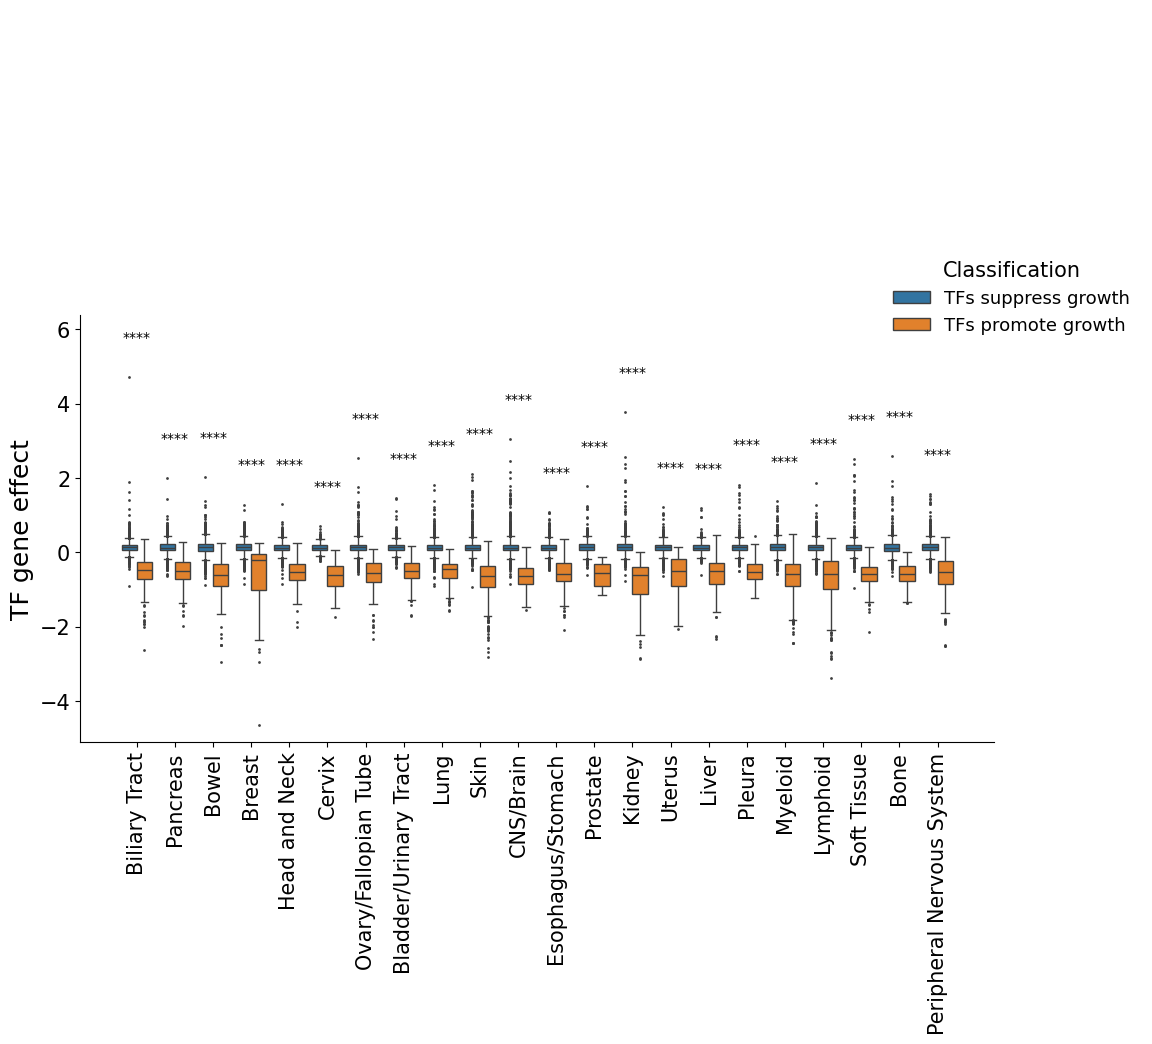

In [101]:
plt.figure(figsize=(30,8))
args = dict(data=crispr_effect_dep, 
            x='OncotreeLineage', y='effect', hue='class', hue_order=["Positive","Negative"])

sns.set_context(rc={'legend.fontsize': 13, 'legend.title_fontsize':15})
g = sns.catplot(kind='box', fliersize = 1, height=5, aspect=2, **args)
#g.get_legend().get_title().set_fontsize('15')
g._legend.set(title ="Classification", loc="upper right", bbox_to_anchor=(1, 1.6))
annot = Annotator(None, pairs)

for ax_n in g.axes:
    for ax in ax_n:
        annot = Annotator(ax, pairs, **args)
        annot.configure(test='Mann-Whitney', text_format='star', loc='inside', line_width=0)
        annot.apply_test().annotate()

labels=["TFs suppress growth", "TFs promote growth"]
for t, l in zip(g._legend.texts, labels):
    t.set_text(l)
plt.xticks(rotation = 90, size = 15)
plt.yticks(size = 15)
plt.ylabel("TF gene effect", size = 18)
plt.xlabel("")
plt.show()

In [ ]:
# # Function to make boxplot for one given lineage
# def make_boxplots(lineage):
#     crispr_dependencies_long_lineage = crispr_dependencies_long.loc[crispr_dependencies_long['OncotreeLineage'] == lineage, :]
#     plt.figure(figsize = (20,6))
#     sns.boxplot(crispr_dependencies_long_lineage, x = "OncotreeSubtype" , y = "Depmap_score", fliersize= 1).set(title = f"{lineage} distribution of CRISPR dependencies")
#     plt.title("Distribution of CRISPR dependencies")
#     plt.xticks(rotation = 90)
#     plt.show()

In [ ]:
# for lineage in crispr_dependencies_long['OncotreeLineage'].unique():
#     make_boxplots(lineage)